In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

Method to read the json files

In [ ]:
import pandas as pd
import glob

def readFiles(path):
    dfs = [] # an empty list to store the data frames
    for root, dirs,files in os.walk(path):
      files = glob.glob(os.path.join(root, '*.json'))
    for f in files:
      dfs.append(os.path.abspath(f)) # concatenate all the data frames in the list.
    return dfs

In [ ]:
train_json = readFiles("/content/drive/MyDrive/713 - Pattern /CLEF2023/task_3A/data/task_3A/train_json")

In [ ]:
dev_json=readFiles("/content/drive/MyDrive/713 - Pattern /CLEF2023/task_3A/data/task_3A/dev_json")

In [ ]:
dev_json[0] # took all the file path in dfs

'/content/drive/MyDrive/713 - Pattern /CLEF2023/task_3A/data/task_3A/dev_json/208b5d6a6b5c9d9e.json'

In [ ]:
filepath = dev_json[0]

Begining the json process
- single json to pandas

In [ ]:
df = pd.read_json(filepath,  typ="series") # converting single path to df 

In [ ]:
df.head()

id                                             208b5d6a6b5c9d9e
title         Court to weigh in on Mississippi abortion ban ...
content       The Supreme Court on Monday set the stage for ...
label                                                         1
label_text                                               center
dtype: object

Creating a dictionary of the json data
- multiple json file to df


In [ ]:
dev_json_list = []
for  f in dev_json:
  with open(f) as doc:
    exp =  json.load(doc)
    dev_json_list.append(exp)

In [ ]:
train_json_list = []
for  f in train_json:
  with open(f) as doc:
    exp =  json.load(doc)
    train_json_list.append(exp)

In [ ]:
print(len(dev_json_list))

5008


In [ ]:
print(len(train_json_list))

13058


In [ ]:
dev_json_list[:20]

[{'id': '208b5d6a6b5c9d9e',
  'title': 'Court to weigh in on Mississippi abortion ban intended to challenge Roe v. Wade',
  'content': 'The Supreme Court on Monday set the stage for a major ruling next year on abortion – one that could upend the Supreme Court’s landmark decisions in Roe v. Wade and Planned Parenthood v. Casey, in which the court ruled that the Constitution protects the right to have an abortion before a fetus becomes viable. The court granted review in Dobbs v. Jackson Women’s Health Organization, a challenge to the constitutionality of a Mississippi law that (with limited exceptions) bars abortions after the 15th week of pregnancy.\n\nThe decision to...',
  'label': 1,
  'label_text': 'center'},
 {'id': '205db17d86845ee8',
  'title': "The Trump Support You Don't See",
  'content': "OPINION\n\nEveryone can see President Donald Trump's rallies. In the final days of the campaign, he is jetting from swing state to swing state, drawing big crowds to outdoor airport events 

In [ ]:
train_df = pd.DataFrame(train_json_list)
train_df.head()

,id,title,content,label,label_text
0,00269b317149c6dc,Madison Cawthorn: Trump-backed Gen Z congressm...,"To his fans, he was a fresh-faced outsider ele...",1,center
1,002355e9bb499a7f,Campaign Cash Is Buying Tons Of Ads,"Iowa's airwaves are already jammed with ads, m...",0,left
2,002317b9ab7d7a27,"Jeb Bush, Ted Cruz Back Indiana’s Religious-Ob...",As Indiana lawmakers moved to clarify the stat...,1,center
3,0027576c4c367043,Portland mayor praises police after 'largely p...,"The mayor of Portland, Ore., said Saturday nig...",2,right
4,002502c12b420af5,Why America’s big cities have become the presi...,Critics see President Trump’s attacks on U.S. ...,1,center


In [ ]:
dev_df = pd.DataFrame(dev_json_list)
dev_df.head()

,id,title,content,label,label_text
0,208b5d6a6b5c9d9e,Court to weigh in on Mississippi abortion ban ...,The Supreme Court on Monday set the stage for ...,1,center
1,205db17d86845ee8,The Trump Support You Don't See,OPINION\n\nEveryone can see President Donald T...,2,right
2,247cc65c89366ab0,"Mulling 2016 run, Biden speaks with top labor ...","Harold A. Schaitberger, the president of the p...",0,left
3,2484c55e66b43bba,OPINION: The Pope is wrong on religious speech,OPINION\n\nThe popular Pope Francis is taking ...,0,left
4,24690573f425d262,Report: Trump Upset With Aides Over Delegate F...,Analysis\n\nIs This the End of the Permanent C...,2,right


In [ ]:
len(dev_df)

5008

In [ ]:
len(train_df)

13058

In [ ]:
  dev_df.to_csv('raw_data_dev.csv', index=False)

In [ ]:
  train_df.to_csv('raw_data_train.csv', index=False)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13058 entries, 0 to 13057
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          13058 non-null  object
 1   title       13058 non-null  object
 2   content     13058 non-null  object
 3   label       13058 non-null  int64 
 4   label_text  13058 non-null  object
dtypes: int64(1), object(4)
memory usage: 510.2+ KB


In [ ]:
train_df.describe()

,label
count,13058.000000
mean,1.124675
std,0.799931
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/713 - Pattern /CLEF2023/task_3A/data/task_3A/raw_data_train.csv")
dev_df = pd.read_csv("/content/drive/MyDrive/713 - Pattern /CLEF2023/task_3A/data/task_3A/raw_data.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

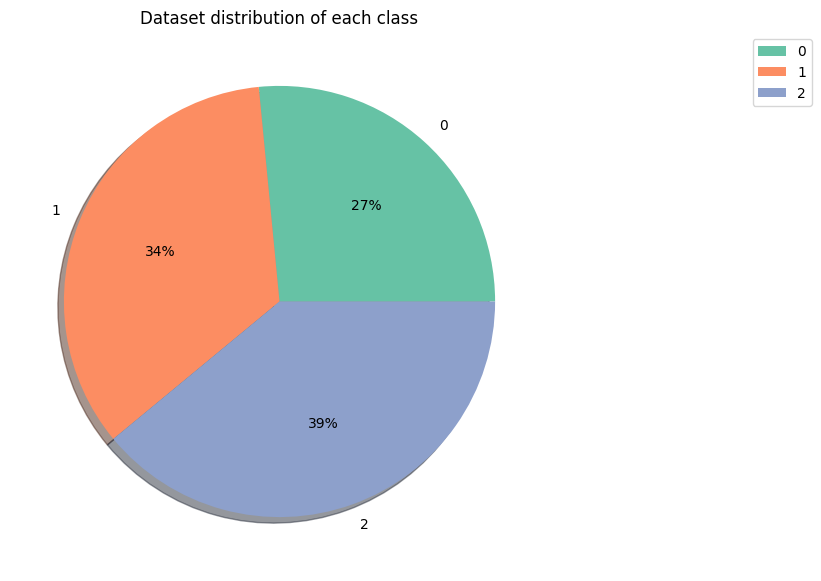

In [ ]:
g=train_df.groupby("label")["label_text"].count()
temp_dict=g.to_dict()

fig = plt.figure(figsize=(15,7))
labels = list(temp_dict.keys())
values = list(temp_dict.values())


plt.pie(values,  labels=labels,autopct='%1.0f%%',shadow=True,colors=sns.color_palette('Set2'))
plt.legend(labels,loc='best',bbox_to_anchor=(1.5, 1.0))
plt.title("Dataset distribution of each class")
plt.show()

#0 - left
#1 -centre
#2 - right

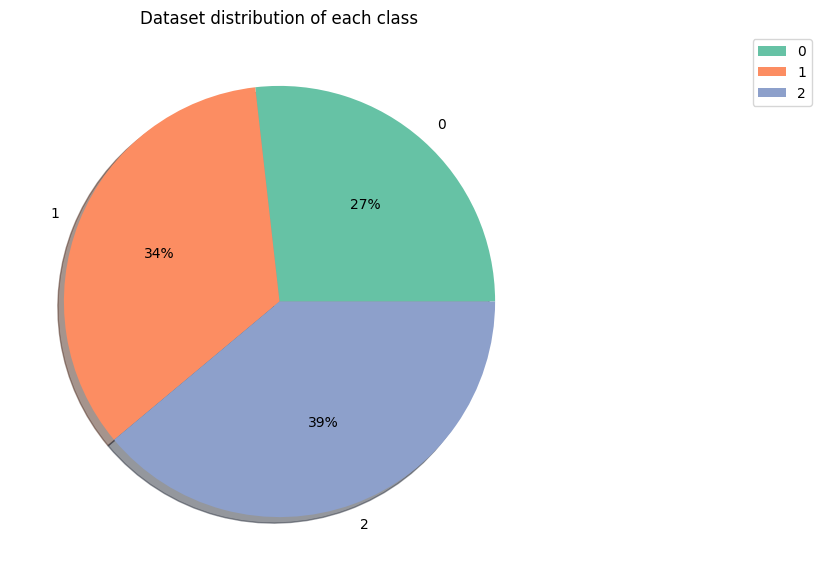

In [ ]:
dev_plt=dev_df.groupby("label")["label_text"].count()
temp_dict=dev_plt.to_dict()

fig = plt.figure(figsize=(15,7))
labels = list(temp_dict.keys())
values = list(temp_dict.values())


plt.pie(values,  labels=labels,autopct='%1.0f%%',shadow=True,colors=sns.color_palette('Set2'))
plt.legend(labels,loc='best',bbox_to_anchor=(1.5, 1.0))
plt.title("Dataset distribution of each class")
plt.show()

In [ ]:
print(train_df.label.value_counts())
print(dev_df.label.value_counts())

2    5093
1    4500
0    3465
Name: label, dtype: int64
2    1949
1    1717
0    1342
Name: label, dtype: int64


##Implementations

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Conv1D, concatenate, Flatten, Concatenate
from tensorflow.keras.layers import  BatchNormalization, Dropout, Activation, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers

from sklearn.metrics import hamming_loss
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score